In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [6]:
df= pd.read_csv('AIML Dataset.csv')

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449083 entries, 0 to 5449082
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 457.3+ MB


In [9]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,5449079
1.0,3


In [10]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,5444875
1.0,4207


In [11]:
df.isnull().sum().sum()

np.int64(7)

In [12]:
df.shape

(5449083, 11)

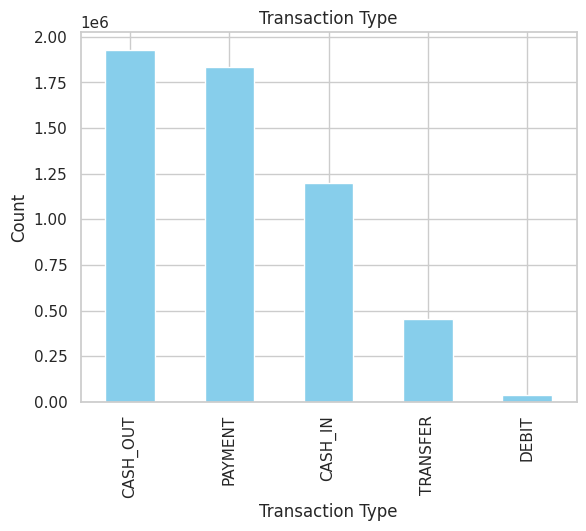

In [13]:
df['type'].value_counts().plot(kind='bar',title='Transaction Type',color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

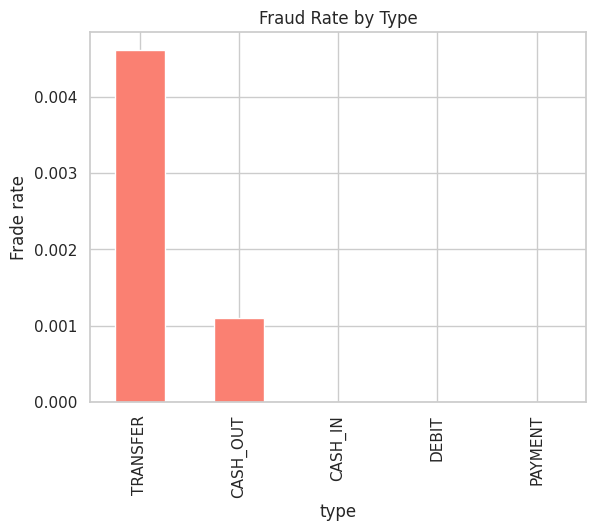

In [14]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',title='Fraud Rate by Type',color='salmon')
plt.ylabel('Frade rate')
plt.show

In [15]:
df['amount'].describe().astype(int)

,amount
count,5449083
mean,181670
std,631466
min,0
25%,13360
50%,75543
75%,209831
max,92445516


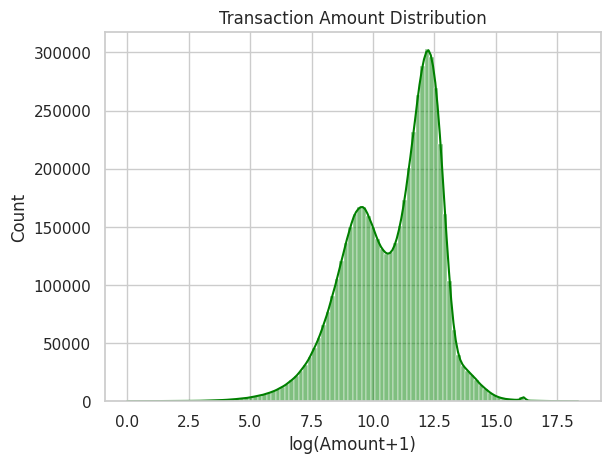

In [16]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color= 'green')
plt.title('Transaction Amount Distribution')
plt.xlabel("log(Amount+1)")
plt.show()

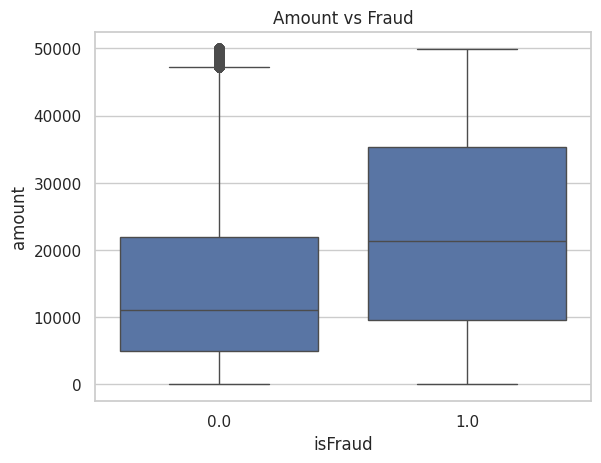

In [17]:
sns.boxplot(data=df[df['amount']<50000],x='isFraud',y='amount')
plt.title('Amount vs Fraud')
plt.show()

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
df['BalanceDiffOrig']= df['oldbalanceOrg']-df['newbalanceOrig']
df['BalanceDiffDest']=df['newbalanceDest']-df['oldbalanceDest']

In [20]:
(df['BalanceDiffOrig']<0).sum()

np.int64(1196212)

In [21]:
(df['BalanceDiffDest']<0).sum()

np.int64(1059920)

In [22]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceDiffOrig,BalanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


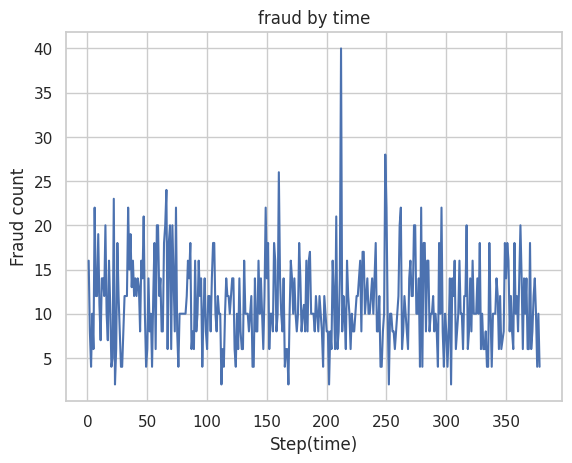

In [23]:
fraud_per_step= df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values, label='fraud_per_step')
plt.xlabel('Step(time)')
plt.ylabel('Fraud count')
plt.title('fraud by time')
plt.show()

In [24]:
df.drop(columns='step',inplace= True)

In [25]:
Top_sender= df['nameOrig'].value_counts().head(10)

In [26]:
Top_sender

,count
nameOrig,
C400299098,3
C1065307291,3
C1976208114,3
C545315117,3
C1999539787,3
C1784010646,3
C1677795071,3
C2098525306,3
C1530544995,3


In [27]:
Top_receiver= df['nameDest'].value_counts().head(10)

In [28]:
Top_receiver

,count
nameDest,
C1286084959,110
C985934102,107
C665576141,105
C2083562754,101
C248609774,101
C451111351,99
C1590550415,99
C1789550256,97
C1360767589,96


In [29]:
fraud_user=df[df['isFraud']==1]['nameOrig'].value_counts().sort_index()

In [30]:
fraud_user

,count
nameOrig,
C1000086512,1
C1000331499,1
C1000513158,1
C1000937208,1
C1001502110,1
...,...
C997942901,1
C998015371,1
C998593582,1


In [31]:
fraud_type=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [32]:
fraud_type

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceDiffOrig,BalanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0.0,0.0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
5449078,CASH_OUT,61763.21,C273731669,56588.91,0.0,C464451704,17300199.63,17361962.84,0.0,0.0,56588.91,61763.21
5449079,CASH_OUT,11224.46,C123738824,0.00,0.0,C1928361995,293708.95,304933.40,0.0,0.0,0.00,11224.45
5449080,CASH_OUT,269372.15,C1947233850,0.00,0.0,C807672040,1499331.01,1768703.16,0.0,0.0,0.00,269372.15
5449081,CASH_OUT,49311.15,C1931716865,0.00,0.0,C1023529958,248861.01,298172.15,0.0,0.0,0.00,49311.14


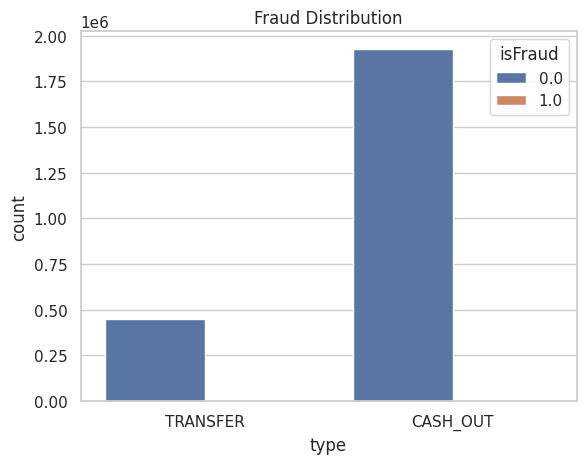

In [33]:
sns.countplot(data=fraud_type,x='type', hue='isFraud')
plt.title('Fraud Distribution')
plt.show()

In [36]:
zero_after_transfer=df[
    (df['oldbalanceOrg']>0) &
    (df['newbalanceDest']==0) &
    (df['type'].isin(['TRANSFER,CASH_OUT']))
]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [38]:
df_model= df.drop(['nameOrig', 'nameDest','isFlaggedFraud'], axis=1)

In [39]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,BalanceDiffOrig,BalanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [40]:
categorical= ['type']
numeric= ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [41]:
y= df_model['isFraud']
X= df_model.drop("isFraud",axis=1)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)])

In [45]:
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


In [46]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
y_pred= clf_pipeline.predict(X_test)

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1089158
         1.0       0.74      0.97      0.84       659

    accuracy                           1.00   1089817
   macro avg       0.87      0.98      0.92   1089817
weighted avg       1.00      1.00      1.00   1089817



In [55]:
confusion_matrix(y_test,y_pred)

array([[1088939,      20],
       [    219,     639]])

In [56]:
clf_pipeline.score(X_test,y_test)

0.9997806971262148

In [57]:
import joblib
joblib.dump(clf_pipeline,'Fraud Detection.pkl')

['Fraud Detection.pkl']